In [217]:
import pandas as pd
import numpy as np
import re

In [218]:
# Load the CSV file
expedia_file_path = r"C:\Users\User\Desktop\Expedia\last_output_df_07_05_2024.csv"
booking_file_path = r"C:\Users\User\Desktop\booking\booking_hotels_clean_data_05_07.csv"
OUTPUT_FILE_PATH = r"C:\Users\User\Desktop\expedia_clean_dfs\expedia_clean_df_05_07.csv"
df = pd.read_csv(expedia_file_path)

In [219]:
# change columns names
df = df.rename(columns={'Hotel Name': "name", "Grade": "score", "Num of Reviews": "reviews", "Curr Price": "price_per_night", "Original Price": "original_price", "Percentage of discount": "discount_perc"})
df = df.rename(columns={"Is refundable": "Free_cancellation", "Late payment": "No_payment", "Breakfast included": "Breakfast", "rating-star": "star_rating"})

In [220]:
print(f"expedia df shape: {df.shape}")
print(f"expedia df columns: {df.columns}")

expedia df shape: (29794, 21)
expedia df columns: Index(['Snapshot', 'start_date', 'end_date', 'name', 'TTT', 'LOS', 'score',
       'reviews', 'price_per_night', 'original_price', 'discount_perc',
       'Free_cancellation', 'No_payment', 'Breakfast', 'Option Member',
       'Index', 'star_rating', 'location_rating', 'neighborhood',
       'km_from_center', 'neighborhood_category'],
      dtype='object')


In [221]:
booking_df = pd.read_csv(booking_file_path)
print(f"booking df shape: {booking_df.shape}")
print(f"booking df columns: {booking_df.columns}")

booking df shape: (25571, 23)
booking df columns: Index(['name', 'score', 'reviews', 'room_type', 'bed_type', 'price',
       'availability', 'los', 'url', 'star_rating', 'location_rating',
       'Snapshot', 'Free_cancellation', 'No_prepayment', 'Limited_rooms',
       'TTT', 'Breakfast', 'index', 'neighborhood', 'km_from_center',
       'price_per_night', 'room_rate', 'neighborhood_category'],
      dtype='object')


In [222]:
df = df.drop(["star_rating", "location_rating", "neighborhood", "km_from_center", "neighborhood_category"], axis=1)
df.columns

Index(['Snapshot', 'start_date', 'end_date', 'name', 'TTT', 'LOS', 'score',
       'reviews', 'price_per_night', 'original_price', 'discount_perc',
       'Free_cancellation', 'No_payment', 'Breakfast', 'Option Member',
       'Index'],
      dtype='object')

In [223]:
# drop duplicates from both dataframes (booking and expedia)
subset_cols = ["name", "TTT", "LOS"]
df = df.drop_duplicates(subset=subset_cols, keep='first')
booking_df = booking_df.drop_duplicates(subset=["name", "TTT", "los"], keep='first')

In [240]:
print(f"expedia df shape: {df.shape}")
print(f"expedia df columns: {df.columns}")
print()
print(f"booking df shape: {booking_df.shape}")
print(f"booking df columns: {booking_df.columns}")

expedia df shape: (14674, 21)
expedia df columns: Index(['Snapshot', 'start_date', 'end_date', 'name', 'TTT', 'LOS', 'score',
       'reviews', 'price_per_night', 'original_price', 'discount_perc',
       'Free_cancellation', 'No_payment', 'Breakfast', 'Option Member',
       'Index', 'star_rating', 'location_rating', 'neighborhood',
       'km_from_center', 'neighborhood_category'],
      dtype='object')

booking df shape: (25571, 23)
booking df columns: Index(['name', 'score', 'reviews', 'room_type', 'bed_type', 'price',
       'availability', 'los', 'url', 'star_rating', 'location_rating',
       'Snapshot', 'Free_cancellation', 'No_prepayment', 'Limited_rooms',
       'TTT', 'Breakfast', 'index', 'neighborhood', 'km_from_center',
       'price_per_night', 'room_rate', 'neighborhood_category'],
      dtype='object')


In [225]:
print(f"unique hotels in expedia df = {len(df['name'].unique())}")
print(f"unique hotels in booking df = {len(booking_df['name'].unique())}")

unique hotels in expedia df = 532
unique hotels in booking df = 405


In [226]:
print("Amount of combined hotels:")
print(len(df[df["name"].isin(booking_df['name'].unique())]["name"].unique()))

Amount of combined hotels:
203


In [227]:
df = df[df["name"].isin(booking_df['name'].unique())]
print(df.shape)

(14674, 16)


In [228]:
# df = df.drop(["Location grade", "Distance from center"], axis=1)

In [229]:
# change columns names
# df = df.rename(columns={'Hotel Name': "name", "Grade": "score", "Num of Reviews": "reviews", "Curr Price": "price_per_night", "Original Price": "original_price", "Percentage of discount": "discount_perc"})
# df = df.rename(columns={"Is refundable": "Free_cancellation", "Late payment": "No_payment", "Breakfast included": "Breakfast", "rating-star": "star_rating"})

In [230]:
def copy_data_from_booking_hotels(booking_df, expedia_df):
    unique_booking_hotels_data = booking_df.drop_duplicates(subset="name")
    expedia_df = expedia_df.merge(unique_booking_hotels_data[["name", "star_rating", "location_rating", "neighborhood", "km_from_center", "neighborhood_category"]], on="name", how='left')
    return expedia_df

df = copy_data_from_booking_hotels(booking_df, df)
df.columns

Index(['Snapshot', 'start_date', 'end_date', 'name', 'TTT', 'LOS', 'score',
       'reviews', 'price_per_night', 'original_price', 'discount_perc',
       'Free_cancellation', 'No_payment', 'Breakfast', 'Option Member',
       'Index', 'star_rating', 'location_rating', 'neighborhood',
       'km_from_center', 'neighborhood_category'],
      dtype='object')

In [231]:
def clean_data(df):
    # Remove non-numeric characters and convert to float for 'score'
    df['score'] = df['score'].astype(str).str.extract(r'(\d+\.\d+)')[0].astype(float)
    
    # Remove non-numeric characters for 'reviews' and handle empty strings
    df['reviews'] = df['reviews'].astype(str).str.replace(r'\D', '', regex=True)
    df['reviews'] = pd.to_numeric(df['reviews'], errors='coerce').fillna(0).astype(int)
    
    # Remove non-numeric characters for 'price_per_night' and handle empty strings
    df['price_per_night'] = df['price_per_night'].astype(str).str.replace(r'[^\d.]', '', regex=True)
    df['price_per_night'] = pd.to_numeric(df['price_per_night'], errors='coerce').fillna(0.0)

    # df['price_per_night'] = df['price_per_night'] / 100
    
    # Remove non-numeric characters for 'original_price' and handle empty strings
    df['original_price'] = df['original_price'].astype(str).str.replace(r'[^\d.]', '', regex=True)
    df['original_price'] = pd.to_numeric(df['original_price'], errors='coerce').fillna(0.0)
    
    # Convert 'Breakfast included' to string and update column to True/False
    df['Breakfast'] = df['Breakfast'].astype(str).str.contains('breakfast', case=False, na=False)
    
    return df

In [232]:
df = clean_data(df)

In [233]:
# Display the cleaned DataFrame
df

,Snapshot,start_date,end_date,name,TTT,LOS,score,reviews,price_per_night,original_price,...,Free_cancellation,No_payment,Breakfast,Option Member,Index,star_rating,location_rating,neighborhood,km_from_center,neighborhood_category
0,14:43.1,06/07/2024,07/07/2024,Omni Berkshire Place,1,1,9.29,1223,269,299,...,False,False,False,False,3,4.0,9.6,Midtown East,1.1,Midtown Manhattan
1,14:43.1,06/07/2024,07/07/2024,The Washington by LuxUrban,1,1,8.28,1006,188,209,...,True,False,False,False,6,4.0,9.4,Manhattan,7.1,Other Manhattan
2,14:43.2,06/07/2024,07/07/2024,Hyatt Grand Central New York,1,1,8.08,3726,246,289,...,False,False,False,False,11,4.0,NaN,Midtown East,1.9,Midtown Manhattan
3,14:43.2,06/07/2024,07/07/2024,"The Cloud One New York-Downtown, by the Motel ...",1,1,8.88,625,189,0,...,False,False,False,False,12,4.0,8.9,Manhattan,7.0,Other Manhattan
4,14:43.2,06/07/2024,07/07/2024,45 Times Square Hotel,1,1,8.68,1268,270,300,...,False,False,False,True,13,3.0,9.6,Manhattan,1.2,Other Manhattan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14669,36:55.4,04/08/2024,09/08/2024,"The Algonquin Hotel Times Square, Autograph Co...",30,5,8.88,1002,265,301,...,False,False,False,False,239,4.0,9.5,Manhattan,1.3,Other Manhattan
14670,36:55.4,04/08/2024,09/08/2024,Archer Hotel New York,30,5,9.29,1004,318,0,...,False,False,False,False,241,4.0,9.5,Manhattan,1.8,Other Manhattan
14671,36:55.5,04/08/2024,09/08/2024,Renaissance New York Chelsea Hotel,30,5,8.48,620,258,323,...,False,False,False,False,244,4.0,NaN,Chelsea,2.8,Midtown Manhattan
14672,36:55.5,04/08/2024,09/08/2024,Hotel Elysee by Library Hotel Collection,30,5,9.29,1000,266,295,...,True,False,False,False,249,4.0,9.6,Midtown East,1.2,Midtown Manhattan


In [234]:
# Assuming df is your DataFrame
columns_to_replace = ['Free_cancellation', 'No_payment', 'Breakfast', 'Option Member']
df[columns_to_replace] = df[columns_to_replace].replace({False: 0, True: 1})

print(df.head())

  Snapshot  start_date    end_date  \
0  14:43.1  06/07/2024  07/07/2024   
1  14:43.1  06/07/2024  07/07/2024   
2  14:43.2  06/07/2024  07/07/2024   
3  14:43.2  06/07/2024  07/07/2024   
4  14:43.2  06/07/2024  07/07/2024   

                                                name  TTT  LOS  score  \
0                               Omni Berkshire Place    1    1   9.29   
1                         The Washington by LuxUrban    1    1   8.28   
2                       Hyatt Grand Central New York    1    1   8.08   
3  The Cloud One New York-Downtown, by the Motel ...    1    1   8.88   
4                              45 Times Square Hotel    1    1   8.68   

   reviews  price_per_night  original_price  ...  Free_cancellation  \
0     1223              269             299  ...                  0   
1     1006              188             209  ...                  1   
2     3726              246             289  ...                  0   
3      625              189               0  ...

In [235]:
# Columns to fill NaN values with the mean
columns_to_impute = ['score', 'star_rating', 'km_from_center', "reviews", "location_rating"]

# Function to fill NaN values with the mean of the column
def fill_na_with_mean(df, columns):
    for column in columns:
        mean_value = df[column].mean()
        df[column].fillna(mean_value, inplace=True)
    return df

# Fill NaN values in the specified columns
df = fill_na_with_mean(df, columns_to_impute)

# Check if NaN values have been filled
nan_summary_after = df[columns_to_impute].isna().sum()
print("NaN values in specified columns after imputation:")
print(nan_summary_after)

NaN values in specified columns after imputation:
score              0
star_rating        0
km_from_center     0
reviews            0
location_rating    0
dtype: int64


In [236]:
df.loc[df["original_price"] == 0, "discount_perc"] = 0

In [237]:
nan_summary_after = df[df.columns].isna().sum()
print("NaN values in specified columns after imputation:")
print(nan_summary_after)

NaN values in specified columns after imputation:
Snapshot                 0
start_date               0
end_date                 0
name                     0
TTT                      0
LOS                      0
score                    0
reviews                  0
price_per_night          0
original_price           0
discount_perc            0
Free_cancellation        0
No_payment               0
Breakfast                0
Option Member            0
Index                    0
star_rating              0
location_rating          0
neighborhood             0
km_from_center           0
neighborhood_category    0
dtype: int64


In [238]:
df.to_csv(OUTPUT_FILE_PATH, index=False)

In [239]:
df["neighborhood_category"].value_counts()

neighborhood_category
Other Manhattan       5886
Midtown Manhattan     5166
Downtown Manhattan    3147
Uptown Manhattan       474
Unknown/Other            1
Name: count, dtype: int64

In [241]:
import seaborn as sns
import matplotlib.pyplot as plt

# Summary statistics
print(df.describe())

# Correlation matrix
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

# Check for missing values
print(df.isnull().sum())

                TTT           LOS         score       reviews  \
count  14674.000000  14674.000000  14674.000000  14674.000000   
mean      18.407932      2.978193      8.749749   1398.925378   
std        7.315686      1.418088      0.381074   1024.732455   
min        1.000000      1.000000      8.080000      8.000000   
25%       13.000000      2.000000      8.480000   1000.000000   
50%       19.000000      3.000000      8.749749   1007.000000   
75%       25.000000      4.000000      9.090000   1530.000000   
max       30.000000      5.000000      9.890000   5932.000000   

       price_per_night  original_price  discount_perc  Free_cancellation  \
count     14674.000000    14674.000000        14674.0       14674.000000   
mean        241.425855      153.974104            0.0           0.487597   
std          56.279838      147.532826            0.0           0.499863   
min          48.000000        0.000000            0.0           0.000000   
25%         207.000000        0.00

ValueError: could not convert string to float: '14:43.1'

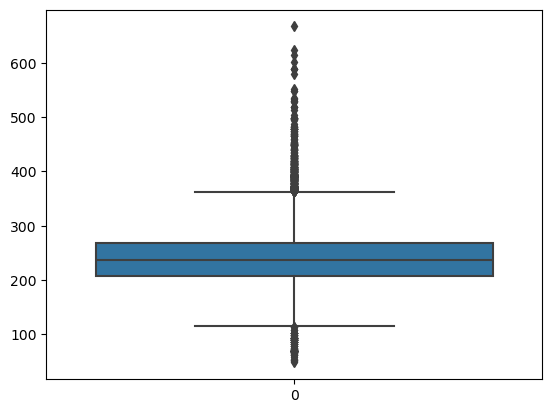

In [242]:
# Box plot to detect outliers
sns.boxplot(df['price_per_night'])
plt.show()

In [246]:
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Load the data
df1 = pd.read_csv(r"C:\\Users\\User\\Desktop\\expedia_clean_dfs\\expedia_clean_df_05_07.csv")
df2 = pd.read_csv(r"C:\\Users\\User\\Desktop\\expedia_clean_dfs\\expedia_clean_df_20_06.csv")
df3 = pd.read_csv(r"C:\\Users\\User\\Desktop\\expedia_clean_dfs\\expedia_clean_df_25_06.csv")

# Merge the dataframes
df = pd.concat([df1, df2, df3], ignore_index=True)

# Remove outliers in 'price_per_night' using the IQR method
Q1 = df['price_per_night'].quantile(0.25)
Q3 = df['price_per_night'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df['price_per_night'] >= lower_bound) & (df['price_per_night'] <= upper_bound)]

# Fill NaN values with the mean of the group
def fill_na_with_group_mean(df):
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    for col in numeric_cols:
        df[col].fillna(df[col].mean(), inplace=True)
    return df

df = fill_na_with_group_mean(df)

# Convert categorical variables to numeric (if any)
df = pd.get_dummies(df, drop_first=True)

# Ensure there are no missing or infinite values
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)

# Separate features and target variable
X = df.drop(columns=['price_per_night'])
y = df['price_per_night']

# Check if all data is numeric
if not np.issubdtype(X.dtypes, np.number):
    non_numeric_columns = X.select_dtypes(exclude=[np.number]).columns
    print(f"Non-numeric columns present in X: {non_numeric_columns}")
    # Convert non-numeric columns to numeric if any
    X = pd.get_dummies(X, drop_first=True)

# Re-check and ensure all data is numeric
assert np.issubdtype(X.dtypes, np.number), "Some columns are still non-numeric."

# Calculate VIF
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)


Non-numeric columns present in X: Index(['Snapshot_00:10.4', 'Snapshot_00:10.5', 'Snapshot_00:10.6',
       'Snapshot_00:10.7', 'Snapshot_00:10.8', 'Snapshot_00:10.9',
       'Snapshot_00:11.0', 'Snapshot_00:11.1', 'Snapshot_00:11.2',
       'Snapshot_00:11.3',
       ...
       'neighborhood_Tribeca', 'neighborhood_Union Square',
       'neighborhood_Upper East Side', 'neighborhood_Upper West Side',
       'neighborhood_Washington Heights',
       'neighborhood_category_Governors Island',
       'neighborhood_category_Midtown Manhattan',
       'neighborhood_category_Other Manhattan',
       'neighborhood_category_Unknown/Other',
       'neighborhood_category_Uptown Manhattan'],
      dtype='object', length=13101)


AssertionError: Some columns are still non-numeric.